<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Чем меньше $\alpha$, тем более гладким становится ряд

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

1) Тут берем большой, т.к. он быстрее адаптируется к меняющемуся тренду.
2) Так как тут шум, то стоит взять маленьким alpha

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

$$y_t = l_t + b_t + e_t; l_t = \alpha(y_t - y_t^*) + l_{t - 1} + b_{t - 1} = \alpha * e_t + l_{t-  1} + b_{t - 1}$$

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

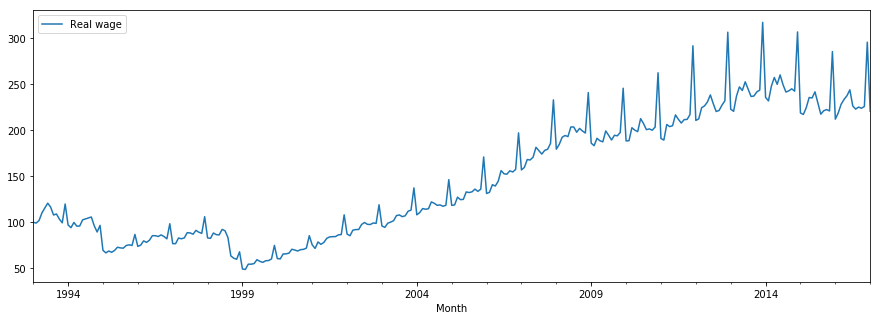

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', sep=';', index_col=0, parse_dates=True, dayfirst=True)

wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha= NOL'.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

In [2]:
forecast = BuildForecast(h=1, ts=wage, AlgName='InitExponentialSmoothing', AlgTitle='EXPONENTA_ODIN', ParamsArray=[{'alpha':.1, 'AdaptationPeriod': 10}], step='M')

# TUT $\alpha$ i s equalto 01


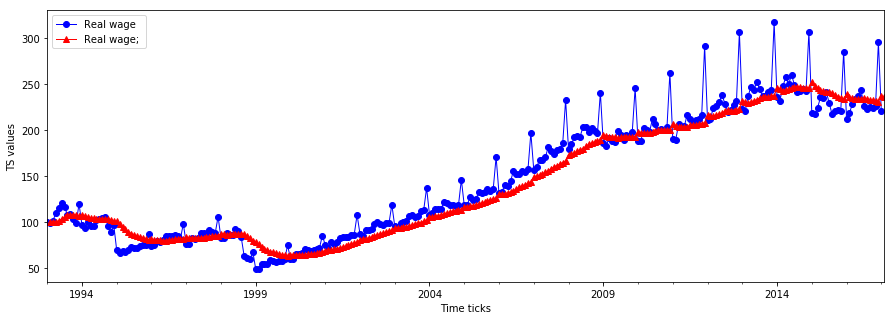

In [3]:
plotTSForecast(wage, forecast.values()[0])

## 1) Search for the optimal $\alpha$ 

In [4]:
ALPHA = np.linspace(0., 1., num=1000)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName ='InitExponentialSmoothing',  AlgTitle='test_old',ParamsArray = ESParamsArray,step='M')

In [5]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

lalaka {'alpha': 0.41141141141141141, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.41241241241241239, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.41041041041041043, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.41341341341341342, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.4094094094094094, 'AdaptationPeriod': 10}       0.058955
lalaka {'alpha': 0.4144144144144144, 'AdaptationPeriod': 10}       0.058955
lalaka {'alpha': 0.40840840840840842, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.41541541541541543, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.40740740740740738, 'AdaptationPeriod': 10}      0.058955
lalaka {'alpha': 0.41641641641641641, 'AdaptationPeriod': 10}      0.058956
lalaka {'alpha': 0.40640640640640641, 'AdaptationPeriod': 10}      0.058956
lalaka {'alpha': 0.41741741741741739, 'AdaptationPeriod': 10}      0.058956
lalaka {'alpha': 0.40540540540540543, 'AdaptationPeriod': 10}      0.058956
lalaka {'alp

# In этом case $\alpha_{opt}$ 0.058955

## 2) draw the forecast with optimial value $\alpha $

In [6]:
import matplotlib.pyplot as plt

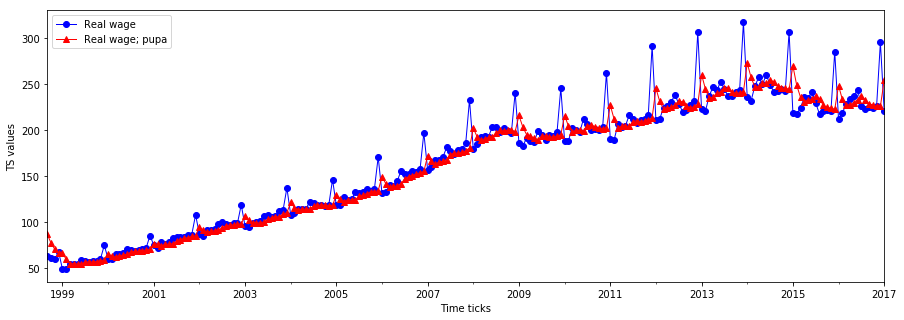

In [7]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01' : '2017-01-01'], FRC_WAGE[algName].loc['1998-09-01' : '2017-01-01']
               , ts_num=1337, alg_title='test')
plt.show()

** Question**
    * Does SES follow to the TS components?
  Ans: Нет, он не может успеть за большими скачками

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [8]:
qualityMACAPE(wage.loc['2015-02-01' : '2017-01-01'], FRC_WAGE[algName].loc['2015-02-01' : '2017-01-01'])[0]

Real wage    0.062919
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [9]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

In [22]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l= x[p]
    s= [np.NaN] * T
    
    full_cycles_num = T / p
    ashki = []
    for j in range(full_cycles_num):
        ashki.append(sum([x[p * (j - 1) + i] for i in range(p)]))
    
    for t in range(p):
        s[t] = 1. / full_cycles_num * sum([x[p * (j - 1) + t] / float(ashki[j]) for j in range(full_cycles_num)]) 
    
    for t in range(p, T):
        if not math.isnan(x[t]):
            this_ind = t % p 

            l_old = l
            l = alpha * (x[t] - s[t - p]) + (1 - alpha) * l_old
            s[t] = delta * (x[t] - l_old) + (1. - delta) * s[t - p]
            
        FORECAST[t+h] = l + s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [23]:
from itertools import product

In [24]:
from tqdm import tqdm

In [25]:
ALPHA = np.linspace(0., 1, num=40)
DELTA = ALPHA
ESParamsArray = [{'alpha':alpha, 'delta': delta, 'seasonality_period':12} for alpha,delta in product(ALPHA, DELTA)]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName ='WintersExponentialSmoothing',  AlgTitle='test',ParamsArray = ESParamsArray,step='M')

ind optimal params  α
  (smoothing of level) and  γ
  (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
3) Draw the forecast that correspond optimal values  α
  and  γ
  (data from 09.1998 to 01.2017).
4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better?

In [26]:
FRC_WAGE.keys()

["pupa {'alpha': 0.64102564102564097, 'seasonality_period': 12, 'delta': 0.25641025641025639}",
 "pupa {'alpha': 0.38461538461538458, 'seasonality_period': 12, 'delta': 0.61538461538461542}",
 "pupa {'alpha': 0.02564102564102564, 'seasonality_period': 12, 'delta': 1.0}",
 "pupa {'alpha': 0.69230769230769229, 'seasonality_period': 12, 'delta': 0.51282051282051277}",
 "pupa {'alpha': 0.64102564102564097, 'seasonality_period': 12, 'delta': 0.66666666666666663}",
 "pupa {'alpha': 0.02564102564102564, 'seasonality_period': 12, 'delta': 0.74358974358974361}",
 "pupa {'alpha': 0.33333333333333331, 'seasonality_period': 12, 'delta': 0.05128205128205128}",
 "pupa {'alpha': 0.92307692307692302, 'seasonality_period': 12, 'delta': 0.53846153846153844}",
 "pupa {'alpha': 0.41025641025641024, 'seasonality_period': 12, 'delta': 0.05128205128205128}",
 "pupa {'alpha': 0.35897435897435898, 'seasonality_period': 12, 'delta': 0.5641025641025641}",
 "pupa {'alpha': 0.76923076923076916, 'seasonality_period

In [27]:
algName

"lalaka {'alpha': 0.41141141141141141, 'AdaptationPeriod': 10}"

In [28]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

pupa {'alpha': 0.66666666666666663, 'seasonality_period': 12, 'delta': 0.48717948717948717}     0.023292
pupa {'alpha': 0.64102564102564097, 'seasonality_period': 12, 'delta': 0.48717948717948717}     0.023312
pupa {'alpha': 0.69230769230769229, 'seasonality_period': 12, 'delta': 0.48717948717948717}     0.023334
pupa {'alpha': 0.66666666666666663, 'seasonality_period': 12, 'delta': 0.51282051282051277}     0.023335
pupa {'alpha': 0.66666666666666663, 'seasonality_period': 12, 'delta': 0.46153846153846151}     0.023337
pupa {'alpha': 0.69230769230769229, 'seasonality_period': 12, 'delta': 0.46153846153846151}     0.023342
pupa {'alpha': 0.64102564102564097, 'seasonality_period': 12, 'delta': 0.51282051282051277}     0.023352
pupa {'alpha': 0.61538461538461542, 'seasonality_period': 12, 'delta': 0.48717948717948717}     0.023361
pupa {'alpha': 0.64102564102564097, 'seasonality_period': 12, 'delta': 0.46153846153846151}     0.023361
pupa {'alpha': 0.69230769230769229, 'seasonality_period

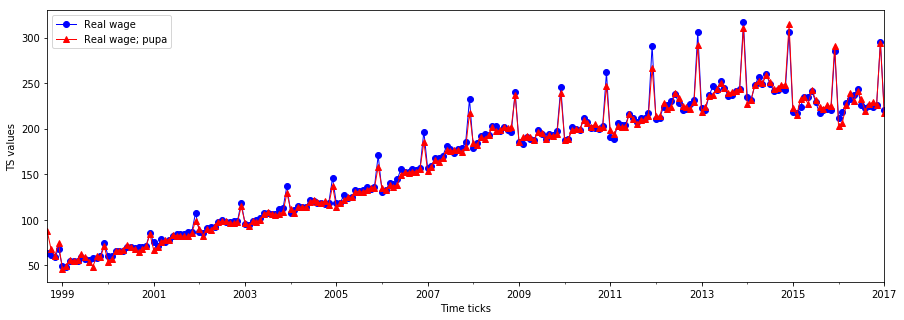

In [29]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01' : '2017-01-01'], FRC_WAGE[algName].loc['1998-09-01' : '2017-01-01']
               , ts_num=1337, alg_title='test')
plt.show()

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [54]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def TheilWage(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    betta = Params['betta']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l= x[p]
    s= [np.NaN] * T
    b = 1./ (p ** 2.) * (x[p : 2 * p].sum() - x[:p].sum())
    
    full_cycles_num = T / p
    ashki = []
    for j in range(full_cycles_num):
        ashki.append(sum([x[p * (j - 1) + i] for i in range(p)]))
    
    for t in range(p):
        s[t] = 1. / full_cycles_num * sum([x[p * (j - 1) + t] / float(ashki[j]) for j in range(full_cycles_num)]) 
    
    for t in range(p, T):
        if not math.isnan(x[t]):
            this_ind = t % p 

            l_old = l
            l = alpha * (x[t] - s[t - p]) + (1 - alpha) * (l_old + b)
            b = betta * (l - l_old) + (1. - betta) * b
            s[t] = delta * (x[t] - l) + (1. - delta) * s[t - p]
            
        FORECAST[t+h] = (l + b * h) + s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [59]:
ALPHA = np.linspace(0., 1, num=12)
BETTA = ALPHA
DELTA = ALPHA
ESParamsArray = [{'alpha':alpha, 'betta':betta, 'delta': delta, 'seasonality_period':12} for alpha, betta,delta in [[0.34,0.34,0.34]]]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName ='TheilWage',  AlgTitle='test',ParamsArray = ESParamsArray,step='M')

In [60]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

pupa {'alpha': 0.34, 'seasonality_period': 12, 'betta': 0.34, 'delta': 0.34}    0.032468
dtype: float64

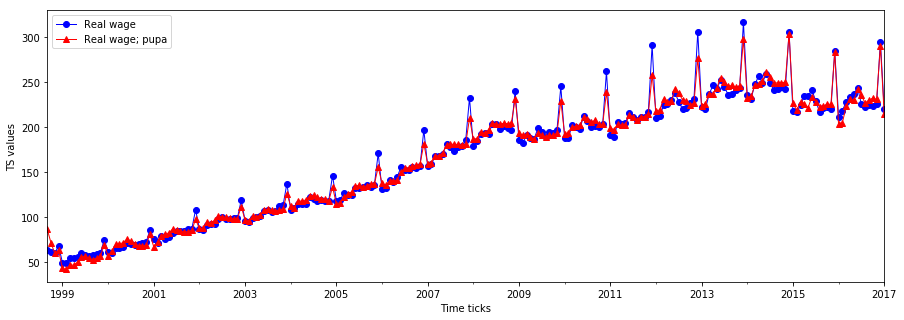

In [61]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01' : '2017-01-01'], FRC_WAGE[algName].loc['1998-09-01' : '2017-01-01']
               , ts_num=1337, alg_title='test')
plt.show()

In [62]:
qualityMACAPE(wage.loc['2015-02-01' : '2017-01-01'], FRC_WAGE[algName].loc['2015-02-01' : '2017-01-01'])[0]

Real wage    0.025131
dtype: float64

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [63]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def TheilWageMultiplicativeSeasonality(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    betta = Params['betta']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l= x[p]
    s= [np.NaN] * T
    b = 1./ (p ** 2.) * (x[p : 2 * p].sum() - x[:p].sum())
    
    full_cycles_num = T / p
    ashki = []
    for j in range(full_cycles_num):
        ashki.append(sum([x[p * (j - 1) + i] for i in range(p)]))
    
    for t in range(p):
        s[t] = 1. / full_cycles_num * sum([x[p * (j - 1) + t] / float(ashki[j]) for j in range(full_cycles_num)]) 
    
    for t in range(p, T):
        if not math.isnan(x[t]):
            this_ind = t % p 

            l_old = l
            l = alpha * (x[t] / s[t - p]) + (1 - alpha) * (l_old + b)
            b = betta * (l - l_old) + (1. - betta) * b
            s[t] = delta * (x[t] / l) + (1. - delta) * s[t - p]
            
        FORECAST[t+h] = (l + b * h) * s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [75]:
# Долго обучается очень(

In [71]:
ALPHA = np.linspace(0., 1, num=12)
BETTA = ALPHA
DELTA = ALPHA
ESParamsArray = [{'alpha':alpha, 'betta':betta, 'delta': delta, 'seasonality_period':12} for alpha, betta,delta in [[0.7, 0.64, 0.62]]]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName ='TheilWage',  AlgTitle='test',ParamsArray = ESParamsArray,step='M')

In [72]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

pupa {'alpha': 0.7, 'seasonality_period': 12, 'betta': 0.64, 'delta': 0.62}    0.043301
dtype: float64

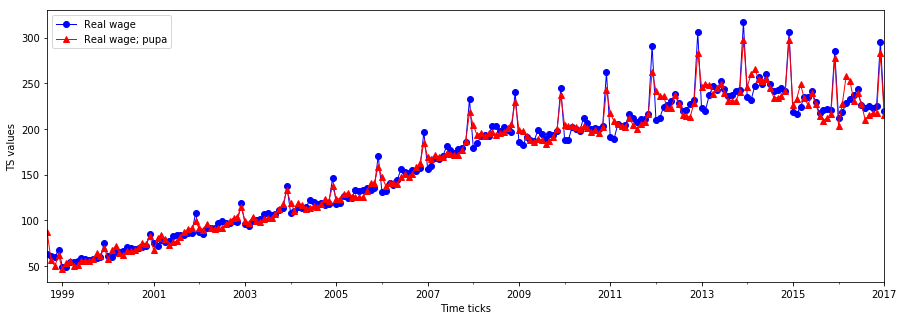

In [73]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01' : '2017-01-01'], FRC_WAGE[algName].loc['1998-09-01' : '2017-01-01']
               , ts_num=1337, alg_title='test')
plt.show()

In [ ]:
qualityMACAPE(wage.loc['2015-02-01' : '2017-01-01'], FRC_WAGE[algName].loc['2015-02-01' : '2017-01-01'])[0]